# Ejemplos de análisis de eficiencia

**Matemáticas Discretas para Ciencias de Datos**

Prof. Leonardo Ignacio Martínez Sandoval

## Introducción

Ya tenemos las herramientas que nos dan el modelo RAM y el análisis asintótico para obtener un muy buen estimado de qué tantos pasos toma un algoritmo. Es momento de cosechar estos frutos para hacer el análisis de algunos algoritmos.

## Intuición y ejemplo simulado

Como mencionamos anteriormente, hacer la cuenta exacta de pasos que toma un algoritmo es muy difícil. Además, aunque sepamos cuántos pasos toma exactamente, las computadoras que usamos no toman exactamente el mismo tiempo para hacer cada una de las operaciones del modelo RAM. Dependiendo de cómo se hagan las sumas, productos, comparaciones, lecturas de memoria, etc. es posible que la computadora tarde un poco más o un poco menos en hacer cada paso. Además es posible que haya ligeras variaciones si los recursos de una computadora se están usando para otras actividades como escuchar música, navegan en internet, o incluso actividades "silenciosas" como que se esté actualizando el sistema operativo. Por estas razones, es prácticamente imposible predecir cuánto tiempo se tardará de manera exacta una computadora en ejecutar un algoritmo.

Sin embargo, no todo está perdido. El análisis asintótico que presentamos da muy buenas aproximaciones para la cantidad de tiempo que tarda una computadora en ejecutar un algoritmo. Aunque no podamos decir "el algoritmo tardará exactamente $n^5+3n^2-2n+\log n$ segundo en correr", lo que sí podremos decir es "el algoritmo tardará $\Theta(n^5)$ tiempo en correr", lo cual para la mayoría de los casos es suficiente información para saber si estamos dispuestos a esperar ese tiempo, o no.

Veamos esto mediante un ejemplo real. En el siguiente código haremos un experimento. Para cada terna de elementos $(i,j,k)$ con números $i,j,k$ entre $1$ y $n$ calcularemos la suma $i+j+k$. Al final, daremos la suma de todos esos números. Haremos esto para los valores de $n$ entre $1$ y $200$, y para cada $n$ veremos cuánto tiempo se tarda el algoritmo en correr (para ello importamos la librería `datetime` y tomamos tiempos `inicio` y `fin`).

In [4]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

tiempos=[]

for n in range(1,201):
    S=0
    inicio=datetime.now()
    for i in range(1,n+1):
        for j in range(1,n+1):
            for k in range(1,n+1):
                S+=i+j+k
    fin=datetime.now()
    tiempos.append((fin-inicio).total_seconds())

Puedes correr el código por tu cuenta. En una computadora portátil estándar en 2020 tarda aproximadamente un par de minutos en correr. Lo que tenemos en la lista `tiempos` es el tiempo que se tarda el algoritmo en correr para cada $n$ de $1$ a $200$. Si hacemos la gráfica de estos tiempos, obtenemos lo siguiente.

Text(0, 0.5, 'Tiempo de ejecución (seg.)')

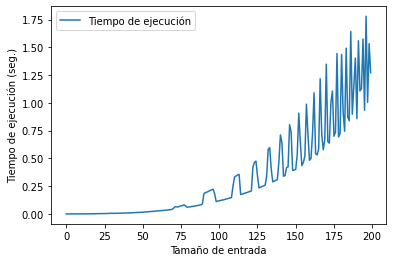

In [5]:
plt.plot(tiempos,label='Tiempo de ejecución')
plt.legend()
plt.xlabel("Tamaño de entrada")
plt.ylabel("Tiempo de ejecución (seg.)")

Aquí se ve lo que mencionábamos. Este no es un comportamiento tan predecible: tiene altibajos y sería muy difícil dar una función que diga exactamente el tiempo tomado. Sin embargo, no todo está perdido. Podemos hacer un análisis de eficiencia asintótica como sigue. Notemos que tenemos un ciclo de $n$ elementos, que dentro tiene otro ciclo de $n$ elementos, que dentro tiene otro ciclo más de $n$ elementos. Así, la parte más interna de estos ciclos se ejecuta $\Theta(n^3)$ veces. Y cada una de estas ejecuciones toma tiempo constante. De este modo, el algoritmo corre en tiempo $\Theta(n^3)$. Esto nos dice que una muy buena forma de aproximar el tiempo que toma el algoritmo por arriba y por abajo es con un múltiplo de $n^3$. 

A continuación hacemos un par de listas que acotan el tiempo de ejecución. Si quieres hacer esto en tu computadora, tendrás que ajustar las constantes que multiplican a $x^3$, pues justo dependen de cada computadora.

[]

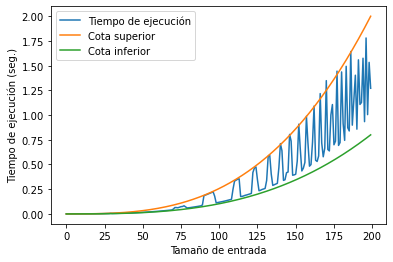

In [12]:
cubicoarriba=[0.00000025*x**3 for x in range(1,201)]
cubicoabajo=[0.0000001*x**3 for x in range(1,201)]
plt.plot(tiempos,label='Tiempo de ejecución')
plt.plot(cubicoarriba, label='Cota superior')
plt.plot(cubicoabajo, label= 'Cota inferior')
plt.legend()
plt.xlabel("Tamaño de entrada")
plt.ylabel("Tiempo de ejecución (seg.)")
plt.plot()

Aquí se ve otra de las motivaciones detrás de las notaciones asintóticas: quizás al inicio las cotas que se dan no funcionan. Por ejemplo, en la gráfica de arribala cota falla como hasta 175. Pero de ahí en adelante, parece ser que el tiempo está muy bien acotado entre ambas curvas. Hagamos más ejemplos para ver cómo hacer otras estimaciones asintóticas.

## Problema de la 2-suma

Consideremos el siguiente problema.

**Problema.** Determinar si en cierto conjunto de números hay dos de ellos que sumen un cierto número que queremos.

**Entrada.** Una lista de números $a_1,a_2,\ldots,a_n$ y un número $N$.

**Salida.** Si existen $a_i$ y $a_j$ (quizás con $i=j$) para los cuales $a_i+a_j=N$.

*Ejemplo.* Tomemos la instancia en la que los números son $3,7,2,5,-1,8$ y el número $N$ es $12$. En este caso, la respuesta es que sí hay dos números que sumen $N$ pues $7+5=12$.

<div style="text-align:right">$\square$</div>

Un posible algoritmo para ver si hay o no hay dos números que sumen $N$ es el siguiente. Para cada pareja de números de los que tenemos, nos fijamos si su suma es $N$ o no. En caso de que alguna sí lo sea, respondemos que sí. Si ninguna lo es, respondemos que no. En código, se vería así:

In [15]:
def dos_suma(L,N):
    long=len(L)
    for j in range(0,long):
        for i in range(j,long):
            if L[j]+L[i]==N:
                return True
    return False

# Algunos ejemplos
print(dos_suma([3,7,2,5,-1,8],12))
print(dos_suma([3,8,2,-1,5,7],12))
print(dos_suma([1,3,8,-4],7))
print(dos_suma([1,3,2,5],7))

True
True
False
True


El algoritmo es correcto, pues pasa por todas las sumas del estilo $a_i+a_j$ con $i\leq j$ y esto basta para cubrir todas las posibles sumas por la conmutatividad de la suma.

Veamos ahora cuántos pasos toma este algoritmo asintóticamente. Recordemos que queremos contar cuántos se toman en el peor de los casos, y no en el mejor. En el mejor de los casos que los primeros dos números sumen lo que queremos, devolveremos `True` inmediatamente. Sin embargo, si en la lista no aparece la suma, el algoritmo pasa por todas las parejas, y un análisis podría ser como sigue:

- Llamemos $n$ a la longitud de la lista.
- El bucle externo puede tener potencialmente $n$ ejecuciones, para cada $j$ de $0$ a $n-1$.
- Una vez que se ha fijado el valor de $j$, el bucle interno puede tener potencialmente $n-j$ ejecuciones.
- Lo que sucede en bucle interno toma una cantidad constante $C$ de pasos.

Así, en caso de que la suma no aparezca, de todas formas tomaríamos a lo más la siguiente cantidad de pasos:

\begin{align*}Cn+C(n-1)+C(n-2)+\ldots+C(2)+C(1)&=C((n-1)+(n-2)+\ldots+2+1)\\&=C \frac{n(n+1)}{2}\\&=\Theta(n^2).\end{align*}

<div style="text-align:right">$\square$</div>

## Multiplicar matrices

Multiplicar matrices es uno de los problemas más fundamentales en matemáticas y sus aplicaciones. Un algoritmo muy directo para realizar la multiplicación de matrices es utilizar la conocida fórmula del producto, que nos dice cómo es cada entrada del producto de matrices en términos de las entradas de los factores.

Lo que nos dice la fórmula del producto es que 
la entrada $(i,k)$ de la matriz producto está dada de la siguiente manera:

$$AB_{ik}=\sum_{j=1}^n a_{ij}b_{jk}.$$

Apliquemos esto a un problema algorítmico.


**Problema.** Multiplicar matrices.

**Entrada.** Una matriz $A$ de $m\times n$ y una matriz $B$ de $n\times l$.

**Salida.** La matriz producto $AB$.

Para resolver este problema podemos utilizar directamente la fórmula del producto, que pasada a pseudocódigo se vería como sigue.


```
para cada i de 1 a m:
   para cada k de 1 a l:
      calculamos la entrada ABik, es decir:
         entrada_ik=0
         para j de 1 hasta n:
             entrada_ik=entrada_ik + a_ij b_jk
             
para cada i de 1 a m:
   para cada k de 1 a l:
       reportar entrada_ik
```

Este algoritmo es correcto pues usa la fórmula directamente. ¿Cuánto tiempo tarda en ejectutarse?

Para el primer bloque de código pasa lo siguiente:
- El bucle exterior toma $m$ ejecuciones.
- El segundo bucle toma $l$ iteraciones.
- El más interno de estos bucles toma $n$ interaciones.
- Cada una de las iteraciones del bloque más interno toma una cantidad constante de pasos.
- Cada una de las iteraciones del bloque de enmedio toma $1+O(n)=O(n)$ pasos. Así, en total toman $lO(n)=O(ln)$ pasos.
- De este modo cada una de las iteraciones del bloque externo toma $O(ln)$ pasos.
- Por lo tanto, el bucle externo toma en total $mO(ln)=O(mln)$ pasos.

Para el segundo bloque de código pasa lo siguiente:

- El bucle externo tiene $m$ iteraciones.
- El bucle interno tiene $l$ iteraciones.
- Cada una de las iteraciones del bucle interno toma $O(1)$ operaciones.
- Así, el bucle interno tiene $lO(1)=O(l)$ operaciones.
- Y por lo tanto, el bucle externo tiene $mO(l)=O(ml)$ iteraciones.

De este modo, en total el algoritmo toma $$O(mln)+O(ml)=O(mln+ml)=O(mln)$$ pasos.

<div style="text-align:right">$\square$</div>

Podríamos ser todavía más precisos y decir que el algoritmo toma $\Theta(mln)$ pasos, pero en muchas ocasiones basta acotar superiormente mediante la notación $O$ grande pues lo que nos interesa es un límite superior para el tiempo que tardará el algoritmo.

Si las matrices son cuadradas de lado $n$, entonces esto da un algoritmo de tiempo $O(n^3)$. ¿Será esto lo más rápido que se pueden multiplicar matrices cuadradas? La respuesta es no, hay mejores formas usando otras heurísticas más avanzadas (ver algortimo de Strassen).

*Aclaración.* ¿Qué quiere decir la notación $O$ grande con más variables?

Es la "extensión natural" de la definición que ya teníamos.

**Definicion.** Una función de tres variables cumple $f(m,n,l)=O(g(m,n,l))$ si existen constantes $c>0$ y $n_0$ tales que 

$$f(m,n,l)\leq cg(m,n,l)$$ cuando $m\geq n_0$, $n\geq n_0$, $l\geq n_0$.

## Búsqueda de subcadenas

Uno de los problemas más clasicos en cadenas es el de buscar subcadenas. Es algo que utilizamos frecuentemente cuando buscamos una palabra en un documento. Ahora los lectores de PDF o los exploradores de internet hacen esto de una manera muy amigable para el usuario: resaltan las palabras, dicen cuántos resultados hay y dan una forma de saltar de uno a otro fácilmente. Sin embargo, el problema algorítmico fundamental que hay que resolver es el siguiente.

**Problema.** Búsqueda de subcadenas.

**Entrada.** Un texto $T$ de longitud $t$ y una cadena $S$ de longitud $s$.

**Salida.**  Determinar si la cadena $S$ forma parte del texto $T$.

Resolveremos este problema mediante el siguiente algoritmo:

```
para cada valor j de 0 a t-s-1:
   para cada valor i de 0 a s-1:
       comparar S[i] con T[j+i]
          si alguno falla:
             continuar el bucle
          si ninguno falla:
             decir que sí está la palabra y terminar el algoritmo
decir que no está la palabra
   
```

El argumento de la correctitud de este algoritmo y su implementación en Python quedan como tarea moral. Pensemos en su eficiencia.

El bucle externo tiene potencialmente $t-s$ iteraciones. El bucle interno tiene potencialmente $s$ iteraciones. Adentro del bucle interno las cosas pasan en tiempo constante. Así, el algoritmo en total toma tiempo $O(s(t-s))=O(st-s^2)$.

En los problemas que nos interesan, $s<t$, pues la subcadena que buscamos es de longitud menor al texto que tenemos. De hecho, usualmente es de longitud mucho menor. Así que $s^2$ usualmente es mucho menor que $st$. De este modo, en las aplicaciones que nos interesan la complejidad sería $O(st)$.

Sí hay instancias que toman tiempo $\Omega(st)$, por ejemplo, aquellas en las que la cadena no se encuentra.

<div style="text-align:right">$\square$</div>



## Búsqueda binaria

En el ejemplo anterior estamos buscando una palabra, pero la estructura del texto que tenemos puede ser muy complicada. Hay una situación en la que encontrar un objeto dentro de una lista se puede hacer de una manera mucho más rápida.

**Problema.** Buscar un objeto en una lista de objetos que están ordenados.

**Entrada.** Tenemos una lista de objetos que ya está ordenada de manera $a_1<a_2<a_3<\ldots<a_n$ y un objeto $x$ a buscar.

**Salida.** Dar un índice $j$ tal que $a_j=x$, o bien decir que no existe dicho índice.

Una forma muy sencilla de resolver este problema es la siguiente. Tomamos $a_1$, vemos si es $x$. Si sí, respondemos $1$ y si no, nos vamos a $a_2$. Vemos si es $x$ y si sí, respondemnos $2$ y si no, vamos a $a_3$, y así sucesivamente. Si al llegar al final ningún elemento fue igual a $x$, entonces respondemos que $x$ no está.

Esta forma de resolver el problema es correcta pues pasamos por todos los elementos. Su tiempo de ejecución es $O(n)$. Esto en general no un tiempo de ejecución malo, pero para este problema en específico hay una forma mucho más rápida y correcta de resolverlo.

La idea general es la siguiente. Tomamos $x$ y lo comparamos con $a_{n/2}$ (o el que tenga índice más cercano a $n/2$). Hay tres posibilidades:

- Si $x<a_{n/2}$, entonces si acaso $x$ está en la lista, debe ser con un índice menor a $n/2$. De esta forma, podemos descartar todos los que tienen índice mayor a $n/2$ y preguntarnos si $x$ está en $a_1,\ldots,a_{n/2 -1}$.
- Si $x>a_{n/2}$, entonces si acaso $x$ está en la lista, debe ser con un índice mayor a $n/2$. De esta forma, podemos descartar todos los que tienen índice menor a $n/2$ y preguntarnos si $x$ está en $a_{n/2+1},\ldots,a_n$.
- Si $x=a_{n/2}$, entonces podemos afirmar en ese momento que $x$ sí está en la lista, y además que está en la posición $n/2$.

Notemos entonces que con una cantidad constante de pasos:

- O bien resolvemos el problema y decimos dónde está el elemento que estamos buscando.
- O bien, reducimos el problema a uno de tamaño $\approx n/2$

Este algoritmo eventualmente o bien encuentra el número, o bien deja un problema de tamaño $1$ en donde decidir si el número $x$ está o no es sencillo.

Además, a lo más puede haber $\Theta(\log_2 n)$ reducciones a listas más chicas, pues en cada paso el tamaño del problema se divide entre $2$ y tras esta cantidad de reducciones llegamos a un problema chiso y constante.

De esta forma, tenemos un algoritmo correcto para decidir si $x$ está o no, y que corre en tiempo $\Theta(\log_2 n)=O(\Theta(\log n))$.

<div style="text-align:right">$\square$</div>

Tenemos entonces dos algoritmos que nos ayudan a buscar: uno que corre en tiempo $O(n)$ y uno que corre en tiempo $O(\log n)$. Si lo único que nos interesa es el tiempo, el segundo algoritmo es mucho más rápido. Esta es la manera en la que compararemos distintos algoritmos entre sí.

A continuación se muestra una implementación en Python de búsqueda binaria, que únicamente nos responde si el objeto está o no, sin decirnos con qué índice. Utiliza una heurística llamada recursión, en donde llamamos la función que queremos dentro de la función misma.

In [23]:
# Es importante que la lista L que pongamos esté ordenada.
def busqueda_binaria(L,x):
    long=len(L)
    if long==0:
        return(False)
    mitad=int(long/2) #Sup. tiempo constante
    if L[mitad]==x: #Si encontró a x
        return(True)
    else:
        if L[mitad]<x:
            M=L[mitad+1:]
        if L[mitad]>x:
            M=L[0:mitad]
        found=busqueda_binaria(M,x) #Aquí vamos a un problema de tamaño long/2
    return(found)
        
L=[1,3,4,7,9,14,17,20,26,28,33,40,41,42,45]
print(busqueda_binaria(L,7))
print(busqueda_binaria(L,17))
print(busqueda_binaria(L,16))
print(busqueda_binaria(L,33))
print(busqueda_binaria(L,22))

True
True
False
True
False


## Tarea moral

Los siguientes problemas te ayudarán a practicar lo visto en esta entrada. Para resolverlos, necesitarás usar herramientas matemáticas, computacionales o ambas.

1. Realiza un análisis asintótico del tiempo de ejecución del siguiente pseudocódigo.

```
para cada i de 1 a n:
    para cada j de 1 a n:
        para cada k de 1 a i+j:
            realizar la suma i+j+k y guardarla en A[i,j,k]
            
para cada i de 1 a n:
    para cada j de 1 a i:
        para cada k de 1 a n-j:
            realizar la suma i+j+k y guardarla en B[i,j,k]
            
realizar la suma de todos los A[i,j,k] y llamarle A
realizar la suma de todos los B[i,j,k] y llamarle B

mostrar si es más grande A ó B
```
            
            
2. Se tiene una lista de números $a_1,a_2,\ldots a_n$. Queremos saber si hay dos de ellos que estén juntos en la lista y que sumen cierto número $M$ dado. Da un algoritmo que resuelva este problema en tiempo $O(n)$.
3. Queremos saber si dado un conjunto de números hay tres de ellos (quizás repetidos) cuya suma sea otro número dado. 
    - Plantea el problema algorítmico de manera formal
    - Propón un algoritmo para resolverlo.
    - Muestra que es correcto e identifica en cuánto tiempo corre.
    - Usa el algoritmo  para ver si hay $3$ elementos en la lista $$[5,1,12,47,21,7,11,7,28,12,5,2,9,2,4,11,21]$$ cuya suma sea $76$.
4. Implementa en Python el algoritmo de multiplicación de matrices y úsalo para realizar la siguiente operación de matrices:

$$\begin{pmatrix} 1 & 0 & 4 \\ 2 & 1 & -1 \end{pmatrix}\begin{pmatrix} 0 & 7 & -1\\ 0 & 2 & -2\\ 1 & -1 & 8\end{pmatrix} \begin{pmatrix} 4 & 2 \\ 2 & -1 \\ 5 & 0\end{pmatrix}.$$

5. Adapta la implementación que dimos de búsqueda binaria para que también reporte en qué indice está el elemento. Luego, realiza una simulación con muchos y grafica el tiempo que toma.